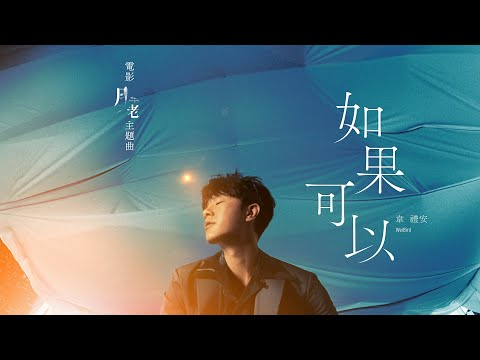

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('8MG--WuNW1Y')

In [2]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

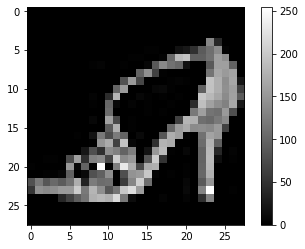

In [4]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 8000

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
from IPython.display import Image

Image('Label.png')

FileNotFoundError: No such file or directory: 'Label.png'

FileNotFoundError: No such file or directory: 'Label.png'

<IPython.core.display.Image object>

In [6]:
train_labels[data_idx]

5

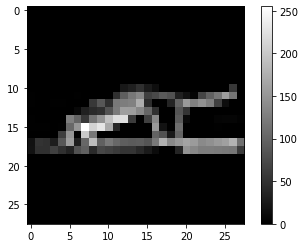

In [7]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 171

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
valid_labels[data_idx]

5

In [9]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 16.4089 - accuracy: 0.7477 - val_loss: 13.9587 - val_accuracy: 0.7725
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 12.1662 - accuracy: 0.7893 - val_loss: 11.9759 - val_accuracy: 0.7958
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 11.8418 - accuracy: 0.7948 - val_loss: 13.9410 - val_accuracy: 0.7701
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 10.8311 - accuracy: 0.7984 - val_loss: 12.5052 - val_accuracy: 0.7846
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 10.3319 - accuracy: 0.8050 - val_loss: 16.5187 - val_accuracy: 0.7447


In [16]:
model.predict(train_images[0:10])

array([[-3.60558960e+02, -3.67162994e+02,  3.42630196e+01,
        -2.33908890e+02, -1.02234810e+02,  4.48763092e+02,
         1.15723961e+02,  3.89142548e+02,  1.81998459e+02,
         8.35743225e+02],
       [ 5.30619995e+02, -1.72921295e+02,  3.34246735e+02,
         1.17228851e+02,  4.86359596e+01, -1.23246936e+03,
         3.27972748e+02, -1.42326831e+03, -1.04254341e+02,
        -4.59928162e+02],
       [ 1.17392860e+02,  6.99156189e+01,  9.67482758e+01,
         1.07201851e+02,  8.86478348e+01, -4.92138916e+02,
         1.27325172e+02, -4.95029083e+02, -1.12495522e+02,
        -1.26058960e+02],
       [ 2.23441193e+02,  8.57029648e+01,  2.15932831e+02,
         2.19621048e+02,  1.23560051e+02, -7.84386719e+02,
         2.39125473e+02, -8.63898010e+02, -1.13552162e+02,
        -5.67974182e+02],
       [ 2.59812195e+02,  2.49292297e+02,  2.20282928e+02,
         2.99045258e+02,  2.17308517e+02, -8.53228210e+02,
         2.35665939e+02, -6.01045410e+02, -4.50490112e+01,
        -5.

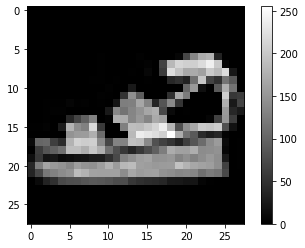

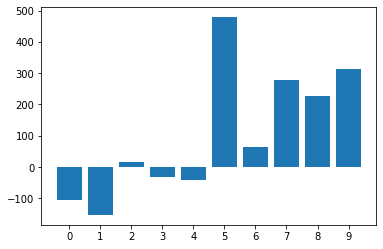

correct answer: 5


In [17]:
data_idx = 177 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])

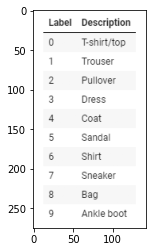

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Label.png')
imgplot = plt.imshow(img)
plt.show()

In [19]:
train_images[data_idx].flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   

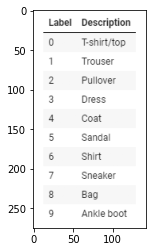

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Label.png')
imgplot = plt.imshow(img)
plt.show()

In [22]:
import cv2

img = cv2.imread('Label.png',0)
cv2.imshow('Label.png', img)
cv2.namedWindow('Label.png', cv2.WINDOW_NORMAL)
cv2.waitKey(0)
cv2.destroyAllWindows()